# Credit Card Fraud Detection:

### Information:
#### Authors:
- **Fuchs** Samuel
- **Wohlgemuth** Anton h11778996

#### Course:
- 1636 Data Analytics



## Project Overview:

### Context:
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Data:

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in **two days, where we have 492 frauds out of 284,807 transactions**. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


# Für Samuel :)

### Was habe ich gemacht:

Daten eingelesen und mir ein Bild davon gemacht. 
Data Preprocessing Steps
Verschiedene Methoden um imbalanced Data zu handeln, ausprobiert. 
- Undersampling hat funktioniert
- Oversampling hat funktioniert
- SMOTE -> Code vorhanden aber Kernel died

Eine Funktion geschrieben welche die wichtigsten Metrics eines Models plottet (Accuracy, F1- Score, TP,FP,TN,FN, etc. CPU Runtime)

Verschiedenen Modelle trainiert und jeweils mithilfe von GridSearchCV die Parameter der Modelle optimiert. 
Hab die Modelle immer auf den undersampled/oversampled Datensatz trainiert und zur evaluierung (Accuracy Score) den gesamten Datensatz hergenommen. Die Zellen die den Oversampled Datensatz verwenden habe ich nicht alle ausgeführt, da der Kernel crashen könnte. 
Auch bei der Hyperparametersuche des XGBoosts stirbt der Kernel (Cell nicht ausführen) 

Zum Abschluss habe ich noch mithilfe von PCA die Anzahl der Komponenten in unseren Datensatz von 30 auf 10 reduziert und nocheinmal jedes Modell auf den neuen (transformten) Datensatz trainiert. und jeweiligen Report des Modells geplottet. 

### TODO: 
- **Objective ausfüllen** 
    - (Why did we choose this project?)
- **Conclussion schreiben:**
    - Verschiedenen Modelle anhand der Scores beschreiben 
    - Wo die höchste Accuracy/F1-Score/Precission/Recall
    - Welche Modelle waren am Schnellsten?
    - Wieviel Accuracy wurde durch PCA verloren?



# OBJECTIVE: (Why did we choose this project?)

TODO

# Plan of attack:
- **Importing necessary libaries**
- **Reading data**
- **Inspecting the data**
- **Experimenting w/ different methods to handle the imbalanced data**
    - Undersampling
    - Oversampling 
    - SMOTE
- **Trying and Comparing different classification methods**
    - Logistic Regression
    - KNN
    - SVM
    - Random Forest
    - LGBM
    - XGBoost
- **Hyperparameter optimization**
- **PCA**
- **Conclussion**

## Importing libaries:

In [73]:
import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # to split the data
from sklearn.model_selection import KFold # For cross vbalidation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')
import plotly.offline as py
import lightgbm as lgb
import xgboost as xgb

## Reading the data:

In [74]:
import pandas as pd
df = pd.read_csv('data/creditcard.csv')

In [75]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Visualizing the two clases (normal transaction / fraud)

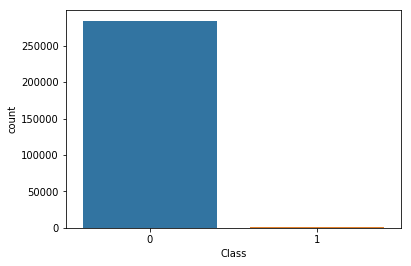

In [76]:
sns.countplot("Class",data=df)

### How many fraud / normal transactions?

In [77]:
number_frauds = len(df[df['Class']==1])
perc_frauds = number_frauds/len(df)
print("There are " + str(number_frauds) + " Fraud transaction. -> " + str(perc_frauds*100) + "%") 

number_normal = len(df[df['Class']==0])
perc_normal = number_normal/len(df)
print("There are " + str(number_normal) + " normal transaction. -> " + str(perc_normal*100) + "%") 

There are 492 Fraud transaction. -> 0.1727485630620034%
There are 284315 normal transaction. -> 99.82725143693798%


### Distribution of both transactions classes:

Text(0.5,1,'Amount normal transactions')

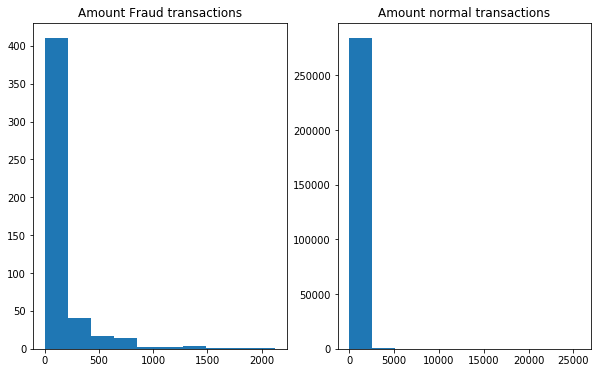

In [78]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.hist(fraud['Amount'])
plt.title('Amount Fraud transactions')

plt.subplot(1,2,2)
plt.hist(normal['Amount'])
plt.title('Amount normal transactions')

## Tackling the imbalanced classification problem:

The main problem we have is that we have a lot more normal transaction data, than fraud transactions. 

In order to fix this probblem we tried the following methods:

- **Undersampling**
- **Oversampling**
- **Synthetic Samples SMOTE**

#### Four Outcomes of Binary Classification

* **True positives:** data points labeled as positive that are actually positive
* **False positives:** data points labeled as positive that are actually negative
* **True negatives:** data points labeled as negative that are actually negative
* **False negatives:** data points labeled as negative that are actually positive

#### Recall and Precision Metrics
* **Recall:** ability of a classification model to identify all relevant instances
* **Precision:** ability of a classification model to return only relevant instances
* **F1 score:** single metric that combines recall and precision using the harmonic mean

# Data Preprocessing:

Defining functions that we may need later on

In [79]:
def standardize(X_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return(X_train, X_test)

In [80]:
def preprocessing (data):
    X = data.ix[:,data.columns != "Class"]
    y = data.ix[:,data.columns=="Class"]
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    return(X_train, X_test, y_train, y_test)

### Splitting the whole Dataset in Train/Test

In [81]:
X_train, X_test, y_train, y_test = preprocessing(df)

## UNDERSAMPLING

In order to undersample we need all entries of the fraud class an only a portion of the normal transactions!

We defined a function undersample in order to try out different proportions of the normal - fraud transactions

Looking for the best ratio by simply using a logistic regression

In [82]:
def undersample(normal,fraud, proportion):
    
    # Getting the indices
    fraud_indices= fraud.index
    normal_indices = normal.index
    
    # getting normal indices for the undersample set
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(proportion*number_frauds),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    
    # Subsetting undersample set
    undersample_data = df.iloc[undersample_data,:]
    
    
    # Results:
    print('The Undersample consists of: \n'
         + str(len(undersample_data[undersample_data['Class']==0])) + " ("+str(len(undersample_data[undersample_data['Class']==0])/len(undersample_data)*100)+"%)"
         + ' normal transactions\n' 
         + str(len(undersample_data[undersample_data['Class']==1])) + " ("+str(len(undersample_data[undersample_data['Class']==1])/len(undersample_data)*100)+"%)"
         + ' fraud transactions\n'
         + str(len(undersample_data)) + " total transactions")
    return(undersample_data)

In [83]:
from sklearn.model_selection import cross_val_score

for i in range(1,5,1):
    print("------------------------------------------------------------\n" + 
          "------------------  Undersample 1:" + str(i)+"  -----------------------\n" + 
          "------------------------------------------------------------\n")
    undersample_data = undersample(normal,fraud,i)
    model = LogisticRegression()
    scores = cross_val_score(model, undersample_data.ix[:,undersample_data.columns != "Class"],undersample_data.ix[:,undersample_data.columns=="Class"] )
    scores = cross_val_score(model, undersample_data.ix[:,undersample_data.columns != "Class"],undersample_data.ix[:,undersample_data.columns=="Class"] )
    print("------------------------------------------------------------")
    print('Model Score: ' + str(np.mean(scores)) + '\n')

------------------------------------------------------------
------------------  Undersample 1:1  -----------------------
------------------------------------------------------------

The Undersample consists of: 
492 (50.0%) normal transactions
492 (50.0%) fraud transactions
984 total transactions
------------------------------------------------------------
Model Score: 0.910569105691

------------------------------------------------------------
------------------  Undersample 1:2  -----------------------
------------------------------------------------------------

The Undersample consists of: 
984 (66.66666666666666%) normal transactions
492 (33.33333333333333%) fraud transactions
1476 total transactions
------------------------------------------------------------
Model Score: 0.89566395664

------------------------------------------------------------
------------------  Undersample 1:3  -----------------------
------------------------------------------------------------

The Unders

In [84]:
data_undersample = undersample(normal,fraud,4)

The Undersample consists of: 
1968 (80.0%) normal transactions
492 (20.0%) fraud transactions
2460 total transactions


In [85]:
data_undersample["Normalized Amount"] = StandardScaler().fit_transform(data_undersample['Amount'].values.reshape(-1, 1))
#dropping 'Time', 'Amount'
data_undersample.drop(["Time","Amount"],axis=1,inplace=True)
data_undersample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.362200
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.544010
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.502368
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.149599
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.358597


## OVERSAMPLING:

First we split our data in training and test data as before, obviously we will only oversample in the training set!

In [86]:
X_train["Class"]= y_train["Class"] # combining class with original data
data_train = X_train.copy() # for naming convention

In [87]:
fraud_trans_os = data_train[data_train['Class']==1]
normal_trans_os = data_train[data_train['Class']==0]

In [88]:
for i in range(180): # I set the range manually to achieve a split of 80%/20%
    normal_trans_os= normal_trans_os.append(fraud_trans_os)
data_oversampling = normal_trans_os.copy() 
print("length of oversampled data is ",len(data_oversampling))
print("Number of normal transcation in oversampled data",len(data_oversampling[data_oversampling["Class"]==0]))
print("No.of fraud transcation",len(data_oversampling[data_oversampling["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(data_oversampling[data_oversampling["Class"]==0])/len(data_oversampling))
print("Proportion of fraud data in oversampled data is ",len(data_oversampling[data_oversampling["Class"]==1])/len(data_oversampling))

length of oversampled data is  279835
Number of normal transcation in oversampled data 213235
No.of fraud transcation 66600
Proportion of Normal data in oversampled data is  0.762002608680115
Proportion of fraud data in oversampled data is  0.23799739131988493


### Standardizing the amount:

In [89]:
data_oversampling["Normalized Amount"] = StandardScaler().fit_transform(data_oversampling['Amount'].values.reshape(-1, 1))
#dropping 'Time', 'Amount'
data_oversampling.drop(["Time","Amount"],axis=1,inplace=True)
data_oversampling.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized Amount
196066,-1.440684,0.999519,0.748581,0.555055,-0.789913,3.266579,1.362350,-1.667751,0.160718,-0.035699,...,1.672643,0.831751,0.069476,-0.327263,-0.233806,-0.330947,0.103815,-0.200824,0,1.015160
73839,1.080513,-0.744898,0.809880,0.218429,-1.174130,-0.112671,-0.647186,0.144692,1.449600,-0.448242,...,-0.231549,-0.667196,-0.039452,-0.075927,0.122060,0.969432,-0.059890,0.020971,0,-0.013160
120119,1.288584,0.233477,0.160397,0.429689,-0.017600,-0.488791,0.119168,-0.201057,-0.019109,-0.095244,...,-0.293637,-0.842562,0.009122,-0.437857,0.350089,0.142190,-0.028049,0.015038,0,-0.306011
55087,1.235939,0.236621,0.170233,0.506960,-0.222195,-0.576144,-0.077023,0.009783,-0.083936,-0.090058,...,-0.266881,-0.844161,0.085011,-0.064246,0.203568,0.100301,-0.032563,0.015585,0,-0.367857
1992,-2.281604,2.311501,-0.039098,-1.020338,-0.443675,-0.579518,0.040473,0.870113,0.567821,0.408086,...,-0.304800,-0.607748,-0.025686,-0.427980,0.224857,0.369988,0.580846,0.351721,0,-0.356191


In [90]:
# Preparing whole dataset
X_test.drop(["Time"],axis=1,inplace=True)

## SMOTE:

We also tried handling our data imbalance with the SMOTE Technique (Synthetic Minority Over-sampling Technique)

We put in some time trying to make it work, but somehow our kernel always kept crashing, therefore we uncommented the cells below, and continued working with the undersampled and oversampled data. 
Maybe we can fix this problem in the future!

In [36]:
#from imblearn.over_sampling import SMOTE

In [37]:
#os = SMOTE(random_state=0)

In [38]:
#data_smote_X,data_smote_y= os.fit_sample(X_train,y_train)
#data_smote_X = pd.DataFrame(data= data_smote_X,columns=X_train.columns )
#data_smote_y= pd.DataFrame(data=data_smote_y,columns=["Class"])

# SUMMARY:
#print("length of oversampled data is ",len(data_smote_X))
#print("Number of normal transcation in oversampled data",len(data_smote_y[data_smote_y["Class"]==0]))
#print("No.of fraud transcation",len(data_smote_y[data_smote_y["Class"]==1]))
#print("Proportion of Normal data in oversampled data is ",len(data_smote_y[data_smote_y["Class"]==0])/len(data_smote_X))
#print("Proportion of fraud data in oversampled data is ",len(data_smote_y[data_smote_y["Class"]==1])/len(data_smote_X))

In [39]:
#data_smote_X["Normalized Amount"] = StandardScaler().fit_transform(data_smote_X['Amount'].values.reshape(-1, 1))
#data_smote_X.drop(["Time","Amount"],axis=1,inplace=True)
#data_smote_X["Normalized Amount"] = StandardScaler().fit_transform(data_smote_X['Amount'].values.reshape(-1, 1))
#data_smote_X.drop(["Time","Amount"],axis=1,inplace=True)

# Testing different Classification Models:

We trained the models on the undersampled/oversampled data and then tested them on the original dataset.

# Model Report:

In [40]:
def model_report(model):
    
    print("------------------------------------------------------------")
    print("                       Model Report                         ")
    print("------------------------------------------------------------")
    #Model Score:
    print('Model Score: ' + str(model.score(X_test,y_test)) + '\n')
    print("------------------------------------------------------------")
    #Confusion Matrix:
    print('Confusion Matrix:')
    conf_matrix = confusion_matrix(y_test, y_pred)
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    
    print('TN:   ' +str(tn)+  '\n''FP:   ' + str(fp)+ '\n'
          'FN:   ' +str(fn)+ '\n' 'TP:   ' + str(tp)+ '\n')
    
    sns.heatmap(conf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("------------------------------------------------------------")
    #Metrics + F1 Score:
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))
    print('Accuracy: ' +str(Accuracy)+ '\n'
          'Precision: ' + str(Precision) + '\n'
          'Recall: '+ str(Recall) + '\n'
          'F1-Score: ' + str(F1_score)+ '\n')
    print("------------------------------------------------------------")
    

## Logistic Regression:

#### Undersample:

In [64]:
data_undersample = undersample(normal,fraud,4)

The Undersample consists of: 
1968 (80.0%) normal transactions
492 (20.0%) fraud transactions
2460 total transactions


------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.99571641246

------------------------------------------------------------
Confusion Matrix:
TN:   70805
FP:   285
FN:   20
TP:   92



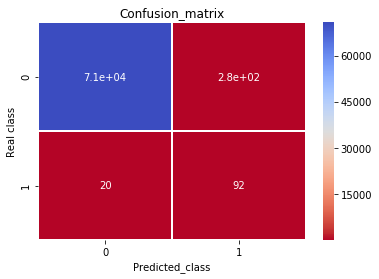

------------------------------------------------------------
Accuracy: 0.99571641246
Precision: 0.244031830239
Recall: 0.821428571429
F1-Score: 0.376278118609

------------------------------------------------------------
CPU times: user 432 ms, sys: 257 ms, total: 690 ms
Wall time: 1.41 s


In [65]:
%%time
model = LogisticRegression()
undersample_X_train, undersample_X_test, undersample_y_train, undersample_y_test = preprocessing(data_undersample)
model.fit(undersample_X_train, undersample_y_train)
y_pred = model.predict(X_test)
model_report(model)

#### Oversample:

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.249094126569

------------------------------------------------------------
Confusion Matrix:
TN:   17619
FP:   53461
FN:   5
TP:   117



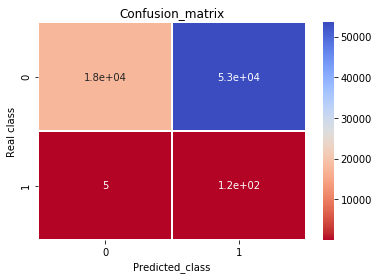

------------------------------------------------------------
Accuracy: 0.249094126569
Precision: 0.00218373212886
Recall: 0.959016393443
F1-Score: 0.00435754189944

------------------------------------------------------------
CPU times: user 4.63 s, sys: 372 ms, total: 5 s
Wall time: 10.1 s


In [91]:
%%time
model = LogisticRegression()
oversample_X_train, oversample_X_test, oversample_y_train, oversample_y_test = preprocessing(data_oversampling)
model.fit(oversample_X_train,oversample_y_train)
y_pred = model.predict(X_test)
model_report(model)

## SVM:

#### Hyperparametertuning: SVM:

In [22]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
]
)
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipeline, param_grid = {
    'svc__C': [1, 10, 100, 1000], 'svc__gamma': [0.001, 0.0001]   
}
)
clf.fit(undersample_X_train,undersample_y_train)

print(clf.best_params_)

{'svc__C': 100, 'svc__gamma': 0.001}


#### Undersample:

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.980506165557

------------------------------------------------------------
Confusion Matrix:
TN:   69722
FP:   1368
FN:   20
TP:   92



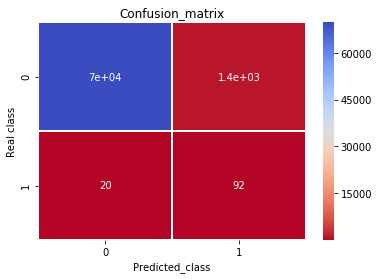

------------------------------------------------------------
Accuracy: 0.980506165557
Precision: 0.0630136986301
Recall: 0.821428571429
F1-Score: 0.117048346056

------------------------------------------------------------
CPU times: user 15.4 s, sys: 167 ms, total: 15.6 s
Wall time: 31.1 s


In [67]:
%%time
model = SVC(C = 100, gamma = 0.001)
undersample_X_train, undersample_X_test, undersample_y_train, undersample_y_test = preprocessing(data_undersample)
model.fit(undersample_X_train, undersample_y_train)
y_pred = model.predict(X_test)
model_report(model)

#### Oversample:

In [29]:
#%%time
#model = SVC()
#oversample_X_train, oversample_X_test, oversample_y_train, oversample_y_test = preprocessing(data_oversampling)
#model.fit(oversample_X_train,oversample_y_train)
#y_pred = model.predict(X_test)
#model_report(model)

## Random Forest:

#### Hyperparametertuning: Random Forest:

In [30]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
]
)
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipeline, param_grid = {
    'rf__n_estimators': list(range(1, 16)),
'rf__max_features' : ['auto', 'sqrt'],
'rf__min_samples_split' : [2, 5, 10],
'rf__min_samples_leaf' : [1, 2, 4],
'rf__bootstrap' : [True, False]    
}
)
clf.fit(undersample_X_train,undersample_y_train)

print(clf.best_params_)

{'rf__bootstrap': True, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 9}


#### Undersample:

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.995786635207

------------------------------------------------------------
Confusion Matrix:
TN:   70796
FP:   294
FN:   6
TP:   106



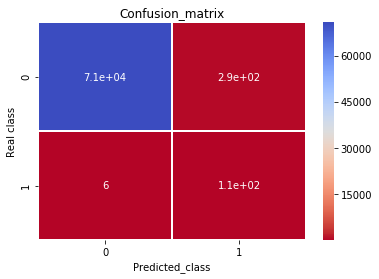

------------------------------------------------------------
Accuracy: 0.995786635207
Precision: 0.265
Recall: 0.946428571429
F1-Score: 0.4140625

------------------------------------------------------------
CPU times: user 646 ms, sys: 169 ms, total: 815 ms
Wall time: 1.69 s


In [68]:
%%time
model = RandomForestClassifier(n_estimators = 9,max_features = 'auto', bootstrap = 1, min_samples_leaf = 1,min_samples_split=5 )
undersample_X_train, undersample_X_test, undersample_y_train, undersample_y_test = preprocessing(data_undersample)
model.fit(undersample_X_train, undersample_y_train)
y_pred = model.predict(X_test)
model_report(model)

#### Oversample:

In [ ]:
#%%time
#model = RandomForestClassifier(n_estimators = 11)
#oversample_X_train, oversample_X_test, oversample_y_train, oversample_y_test = preprocessing(data_oversampling)
#model.fit(oversample_X_train,oversample_y_train)
#y_pred = model.predict(X_test)
#model_report(model)

### KNN:

#### Hyperparametertuning: KNeigbhors:

In [33]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
]
)
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipeline, param_grid = {
    'knn__n_neighbors': [1,2,3,4,5,6,7,8,9],
    'knn__p':[1,2] }
)
clf.fit(undersample_X_train,undersample_y_train)

print(clf.best_params_)

{'knn__n_neighbors': 9, 'knn__p': 1}


#### Undersample:

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.947993033904

------------------------------------------------------------
Confusion Matrix:
TN:   67433
FP:   3657
FN:   46
TP:   66



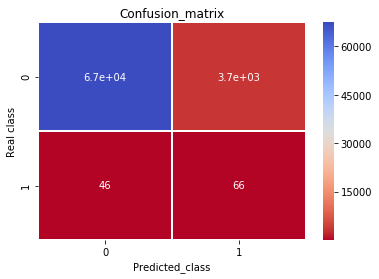

------------------------------------------------------------
Accuracy: 0.947993033904
Precision: 0.0177276390008
Recall: 0.589285714286
F1-Score: 0.0344198174707

------------------------------------------------------------
CPU times: user 1.78 s, sys: 157 ms, total: 1.94 s
Wall time: 3.97 s


In [69]:
%%time
model =  KNeighborsClassifier(n_neighbors = 3, p =1)
oversample_X_train, oversample_X_test, oversample_y_train, oversample_y_test = preprocessing(data_undersample)
model.fit(oversample_X_train,oversample_y_train)
y_pred = model.predict(X_test)
model_report(model)

#### Oversample:

In [ ]:
#%%time
#model =  KNeighborsClassifier()
#oversample_X_train, oversample_X_test, oversample_y_train, oversample_y_test = preprocessing(data_oversampling)
#model.fit(oversample_X_train,oversample_y_train)
#y_pred = model.predict(X_test)
#model_report(model)

### LGBM:

##### Hyperparametertuning: LGBM

In [15]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lgb', lgb.LGBMClassifier())
]
)
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipeline, param_grid = {
    'lgb__num_leaves': list(range(2, 10))  ,
    'lgb__n_estimators':list(range(1, 20))
}
)
clf.fit(undersample_X_train,undersample_y_train)

print(clf.best_params_)

{'lgb__n_estimators': 15, 'lgb__num_leaves': 3}


#### Undersample:

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.996348417179

------------------------------------------------------------
Confusion Matrix:
TN:   70847
FP:   243
FN:   17
TP:   95



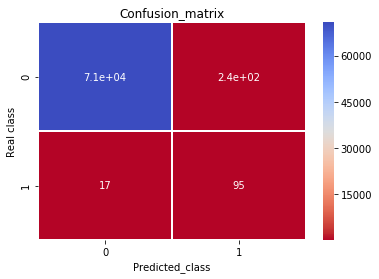

------------------------------------------------------------
Accuracy: 0.996348417179
Precision: 0.281065088757
Recall: 0.848214285714
F1-Score: 0.422222222222

------------------------------------------------------------
CPU times: user 577 ms, sys: 185 ms, total: 762 ms
Wall time: 1.59 s


In [70]:
%%time
lgbm_clf = lgb.LGBMClassifier(n_estimators= 15, num_leaves =3 )
lgbm_clf.fit(undersample_X_train, undersample_y_train)
y_pred = lgbm_clf.predict(X_test)
model_report(lgbm_clf)

#### Oversample:

In [ ]:
%%time
lgbm_clf = lgb.LGBMClassifier(n_estimators= 15, num_leaves =3 )
lgbm_clf.fit(oversample_X_train, oversample_y_train)
y_pred = lgbm_clf.predict(X_test)
model_report(lgbm_clf)

### XGBOOST:

##### Hyperparametertuning: XGBoost

###  Kernel dies!

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBClassifier())
]
)
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipeline, param_grid = {
    'xgb__gamma':[i/10.0 for i in range(0,5)],
    'xgb__min_child_weight':[6,8,10,12],
    'xgb__max_depth':[4,5,6],
    'xgb__n_estimators' :list(range(1, 100))
}
)
clf.fit(undersample_X_train,undersample_y_train)

print(clf.best_params_)

#### Undersample:

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.994578803966

------------------------------------------------------------
Confusion Matrix:
TN:   70708
FP:   382
FN:   4
TP:   108



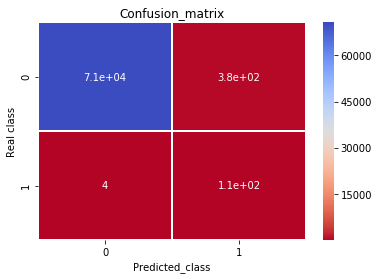

------------------------------------------------------------
Accuracy: 0.994578803966
Precision: 0.220408163265
Recall: 0.964285714286
F1-Score: 0.358803986711

------------------------------------------------------------
CPU times: user 1.48 s, sys: 146 ms, total: 1.63 s
Wall time: 3.31 s


In [71]:
%%time
xgb_clas = xgb.XGBClassifier()
xgb_clas.fit(undersample_X_train,undersample_y_train)
y_pred = xgb_clas.predict(X_test)
model_report(xgb_clas)

#### Oversample:

In [ ]:
%%time
xgb_clas = xgb.XGBClassifier()
xgb_clas.fit(oversample_X_train,oversample_y_train)
X_test.rename(columns={'Amount':'Normalized Amount'}, inplace=True)
y_pred = xgb_clas.predict(X_test)
model_report(xgb_clas)

# How accurate would our model be if we drop some dimensions? (PCA)

- How much accuracy to we lose if we set the number of components to 10?
- How much faster do our models get?

## Undersampled Data:

In [26]:
## Naming Conventions:
X_train, X_test, y_train, y_test = preprocessing(data_undersample)

In [27]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)


In [28]:
from sklearn.decomposition import PCA

p = PCA (n_components = 10)

X_train_transformed = p.fit_transform(X_train)
X_test_transformed = p.fit_transform(X_test)


### Logistic Regression

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.89701897019

------------------------------------------------------------
Confusion Matrix:
TN:   235
FP:   16
FN:   22
TP:   96



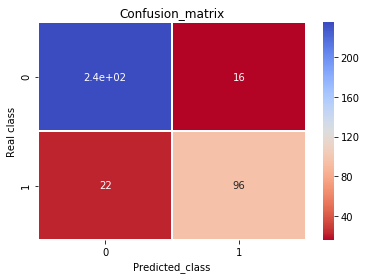

------------------------------------------------------------
Accuracy: 0.89701897019
Precision: 0.857142857143
Recall: 0.813559322034
F1-Score: 0.834782608696

------------------------------------------------------------
CPU times: user 329 ms, sys: 198 ms, total: 527 ms
Wall time: 989 ms


In [49]:
%%time
model = LogisticRegression()
model.fit(X_train_transformed,y_train)
y_pred = model.predict(X_test_transformed)
X_test = X_test_transformed
model_report(model)

### SVM:

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.943089430894

------------------------------------------------------------
Confusion Matrix:
TN:   246
FP:   0
FN:   21
TP:   102



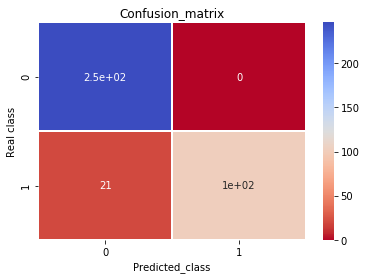

------------------------------------------------------------
Accuracy: 0.943089430894
Precision: 1.0
Recall: 0.829268292683
F1-Score: 0.906666666667

------------------------------------------------------------
CPU times: user 310 ms, sys: 184 ms, total: 494 ms
Wall time: 1.04 s


In [29]:
%%time
model = SVC(C = 100, gamma = 0.001)
model.fit(X_train_transformed,y_train)
y_pred = model.predict(X_test_transformed)
X_test = X_test_transformed
model_report(model)

### K-Neighbors:

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.886178861789

------------------------------------------------------------
Confusion Matrix:
TN:   242
FP:   9
FN:   33
TP:   85



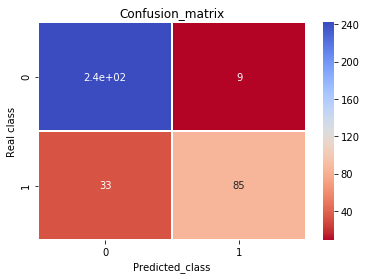

------------------------------------------------------------
Accuracy: 0.886178861789
Precision: 0.904255319149
Recall: 0.720338983051
F1-Score: 0.801886792453

------------------------------------------------------------
CPU times: user 327 ms, sys: 220 ms, total: 547 ms
Wall time: 1.11 s


In [51]:
%%time
model = KNeighborsClassifier(n_neighbors = 3, p =1)
model.fit(X_train_transformed,y_train)
y_pred = model.predict(X_test_transformed)
X_test = X_test_transformed
model_report(model)

### Random Forest:

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.888888888889

------------------------------------------------------------
Confusion Matrix:
TN:   231
FP:   20
FN:   21
TP:   97



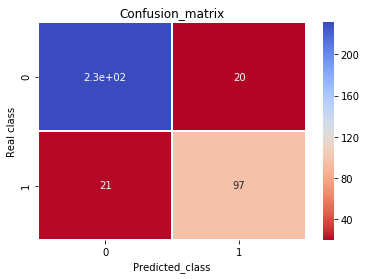

------------------------------------------------------------
Accuracy: 0.888888888889
Precision: 0.82905982906
Recall: 0.822033898305
F1-Score: 0.825531914894

------------------------------------------------------------
CPU times: user 334 ms, sys: 174 ms, total: 508 ms
Wall time: 1.09 s


In [52]:
%%time
model = RandomForestClassifier(n_estimators = 9,max_features = 'auto', bootstrap = 1, min_samples_leaf = 1,min_samples_split=5 )
model.fit(X_train_transformed,y_train)
y_pred = model.predict(X_test_transformed)
X_test = X_test_transformed
model_report(model)

### LGBM:

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.90243902439

------------------------------------------------------------
Confusion Matrix:
TN:   237
FP:   14
FN:   22
TP:   96



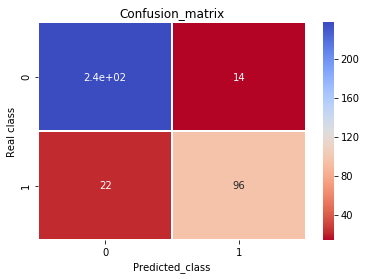

------------------------------------------------------------
Accuracy: 0.90243902439
Precision: 0.872727272727
Recall: 0.813559322034
F1-Score: 0.842105263158

------------------------------------------------------------
CPU times: user 540 ms, sys: 164 ms, total: 704 ms
Wall time: 1.42 s


In [53]:
%%time
lgbm_clf = lgb.LGBMClassifier(n_estimators= 15, num_leaves =3 )
lgbm_clf.fit(X_train_transformed,y_train)
y_pred = lgbm_clf.predict(X_test_transformed)
model_report(lgbm_clf)

### XGBoost:

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.915989159892

------------------------------------------------------------
Confusion Matrix:
TN:   243
FP:   8
FN:   23
TP:   95



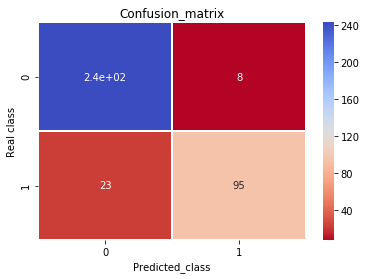

------------------------------------------------------------
Accuracy: 0.915989159892
Precision: 0.922330097087
Recall: 0.805084745763
F1-Score: 0.859728506787

------------------------------------------------------------
CPU times: user 395 ms, sys: 210 ms, total: 605 ms
Wall time: 1.17 s


In [54]:
%%time
xgb_clas = xgb.XGBClassifier()
xgb_clas.fit(X_train_transformed,y_train)
#X_test.rename(columns={'Amount':'Normalized Amount'}, inplace=True)
y_pred = xgb_clas.predict(X_test_transformed)
model_report(xgb_clas)

## PCA (with oversampled data)

In [41]:
## Naming Conventions:
X_train, X_test, y_train, y_test = preprocessing(data_oversampling)

In [42]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)


In [43]:
from sklearn.decomposition import PCA

p = PCA (n_components = 10)

X_train_transformed = p.fit_transform(X_train)
X_test_transformed = p.fit_transform(X_test)


### Logistic Regression

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.949260559328

------------------------------------------------------------
Confusion Matrix:
TN:   52945
FP:   412
FN:   3115
TP:   13040



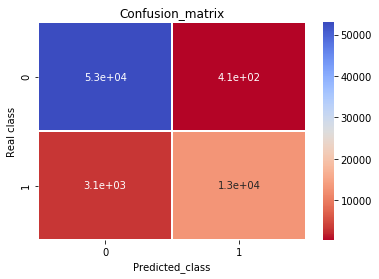

------------------------------------------------------------
Accuracy: 0.949260559328
Precision: 0.969372584002
Recall: 0.807180439492
F1-Score: 0.880872766575

------------------------------------------------------------
CPU times: user 2.01 s, sys: 306 ms, total: 2.32 s
Wall time: 4.7 s


In [44]:
%%time
model = LogisticRegression()
model.fit(X_train_transformed,y_train)
y_pred = model.predict(X_test_transformed)
X_test = X_test_transformed
model_report(model)

### SVM:

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.94326159512

------------------------------------------------------------
Confusion Matrix:
TN:   53056
FP:   301
FN:   3643
TP:   12512



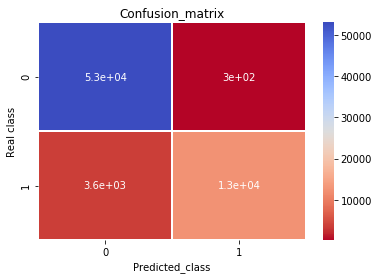

------------------------------------------------------------
Accuracy: 0.94326159512
Precision: 0.976508233825
Recall: 0.774497059734
F1-Score: 0.863849765258

------------------------------------------------------------
CPU times: user 11min 44s, sys: 470 ms, total: 11min 45s
Wall time: 23min 32s


In [45]:
%%time
model = SVC(C = 100, gamma = 0.001)
model.fit(X_train_transformed,y_train)
y_pred = model.predict(X_test_transformed)
X_test = X_test_transformed
model_report(model)

### K-Neighbors:

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.936399470595

------------------------------------------------------------
Confusion Matrix:
TN:   53307
FP:   50
FN:   4371
TP:   11784



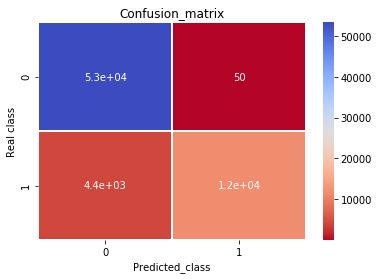

------------------------------------------------------------
Accuracy: 0.936399470595
Precision: 0.995774885922
Recall: 0.729433611885
F1-Score: 0.842045089142

------------------------------------------------------------
CPU times: user 5min 47s, sys: 258 ms, total: 5min 48s
Wall time: 11min 37s


In [46]:
%%time
model = KNeighborsClassifier(n_neighbors = 3, p =1)
model.fit(X_train_transformed,y_train)
y_pred = model.predict(X_test_transformed)
X_test = X_test_transformed
model_report(model)

### Random Forest:

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.949044769248

------------------------------------------------------------
Confusion Matrix:
TN:   53345
FP:   12
FN:   3530
TP:   12625



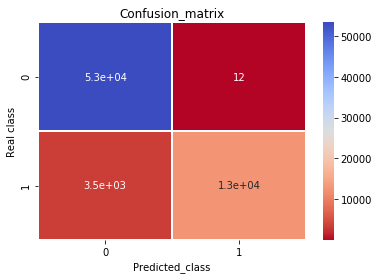

------------------------------------------------------------
Accuracy: 0.949044769248
Precision: 0.999050407533
Recall: 0.781491798205
F1-Score: 0.876979716588

------------------------------------------------------------
CPU times: user 7.94 s, sys: 196 ms, total: 8.14 s
Wall time: 16.3 s


In [47]:
%%time
model = RandomForestClassifier(n_estimators = 9,max_features = 'auto', bootstrap = 1, min_samples_leaf = 1,min_samples_split=5 )
model.fit(X_train_transformed,y_train)
y_pred = model.predict(X_test_transformed)
X_test = X_test_transformed
model_report(model)

### LGBM:

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.953403728853

------------------------------------------------------------
Confusion Matrix:
TN:   53222
FP:   135
FN:   3104
TP:   13051



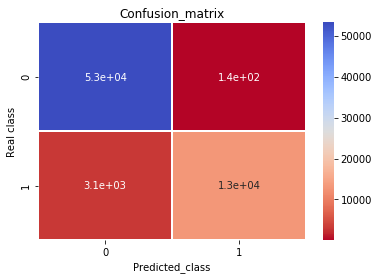

------------------------------------------------------------
Accuracy: 0.953403728853
Precision: 0.989761868649
Recall: 0.807861343237
F1-Score: 0.889608397805

------------------------------------------------------------
CPU times: user 5.2 s, sys: 776 ms, total: 5.98 s
Wall time: 12 s


In [48]:
%%time
lgbm_clf = lgb.LGBMClassifier(n_estimators= 15, num_leaves =3 )
lgbm_clf.fit(X_train_transformed,y_train)
y_pred = lgbm_clf.predict(X_test_transformed)
model_report(lgbm_clf)

### XGBoost:

------------------------------------------------------------
                       Model Report                         
------------------------------------------------------------
Model Score: 0.952569340546

------------------------------------------------------------
Confusion Matrix:
TN:   53252
FP:   105
FN:   3192
TP:   12963



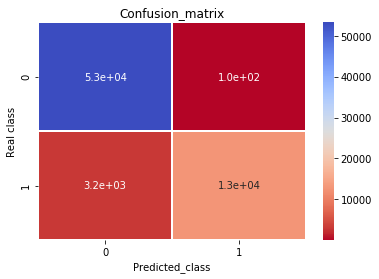

------------------------------------------------------------
Accuracy: 0.952569340546
Precision: 0.991965105601
Recall: 0.802414113278
F1-Score: 0.887177907812

------------------------------------------------------------
CPU times: user 24.9 s, sys: 471 ms, total: 25.3 s
Wall time: 51.7 s


In [49]:
%%time
xgb_clas = xgb.XGBClassifier()
xgb_clas.fit(X_train_transformed,y_train)
#X_test.rename(columns={'Amount':'Normalized Amount'}, inplace=True)
y_pred = xgb_clas.predict(X_test_transformed)
model_report(xgb_clas)

## Conclussion:

*TODO: